Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
'''
Problem 1
If we list all the natural numbers below 10 that are multiples of 3 or 5, we get
3,5,6, and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.
'''

x = sum(set(range(0,1000,3))|set(range(0,1000,5)))
print(x)

233168


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


Linear Regression


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

Train/test evaluation with R2, MAE, and RMSE

In [4]:
def LinearRegression_metrics(y_true, y_pred, dataset_name="Test"):
  r2=r2_score(y_true, y_pred)
  mae=mean_absolute_error(y_true, y_pred)
  rmse=root_mean_squared_error(y_true, y_pred)
  print(f"{dataset_name} R2: {r2:.4f}")
  print(f"{dataset_name} MAE: {mae:.4f}")
  print(f"{dataset_name} RMSE: {rmse:.4f}")
  print()
  return r2, mae, rmse

print("linear regression:")
train_metrics = LinearRegression_metrics(y_train, y_pred_train,"Train")
test_metrics = LinearRegression_metrics(y_test, y_pred_test, "Test")

linear regression:
Train R2: 0.6089
Train MAE: 0.5309
Train RMSE: 0.7235

Test R2: 0.5943
Test MAE: 0.5351
Test RMSE: 0.7273



Scatter plot of predicted vs. true median house values

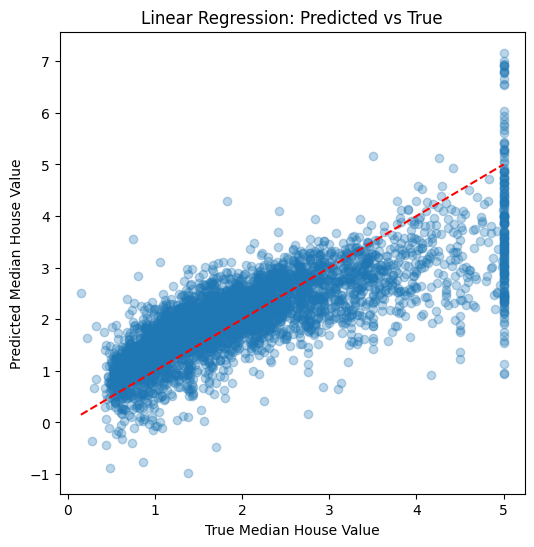

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Linear Regression: Predicted vs True")
plt.show()

Histogram of model prediction errors

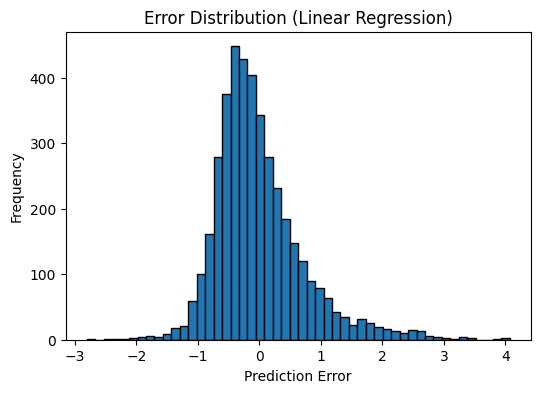

In [19]:
errors = y_test - y_pred_test
plt.figure(figsize=(6,4))
plt.hist(errors, bins=50, edgecolor='black')
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution (Linear Regression)")
plt.show()

Extraction of feature coefficients to assess which feature is important. reference: https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

      Feature  Coefficient
3   AveBedrms     0.593215
7   Longitude    -0.434166
0      MedInc     0.433333
6    Latitude    -0.421449
2    AveRooms    -0.098643
1    HouseAge     0.009293
5    AveOccup    -0.004745
4  Population    -0.000008


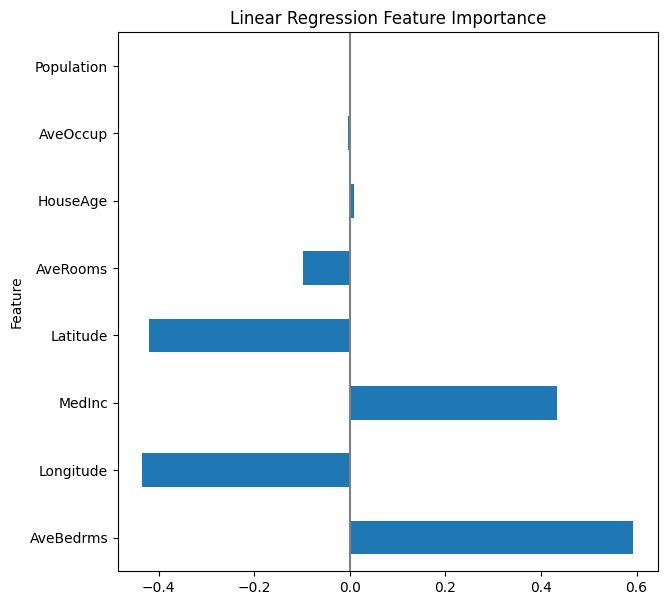

In [7]:
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coef_df)

coef_df.plot(kind="barh", x="Feature", y="Coefficient", figsize=(9, 7), legend=False)
plt.title("Linear Regression Feature Importance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
plt.show()

Other regression methods

In [8]:
from sklearn.linear_model import Ridge, Lasso

def other_regressions(model, X_train, y_train, X_test, y_test, model_name="Model"):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(model_name + ":")
    train_metrics = LinearRegression_metrics(y_train, y_pred_train, "Train")
    test_metrics = LinearRegression_metrics(y_test, y_pred_test, "Test")

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred_test, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("True Median House Value")
    plt.ylabel("Predicted Median House Value")
    plt.title(f"{model_name}: Predicted vs True")
    plt.show()

    errors = y_test - y_pred_test
    plt.figure(figsize=(6,4))
    plt.hist(errors, bins=50, edgecolor='black')
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.title(f"Error Distribution ({model_name})")
    plt.show()

    coef_df = pd.DataFrame({
        "Feature": feature_names,
        "Coefficient": model.coef_
    }).sort_values(by="Coefficient", key=abs, ascending=False)

    print(coef_df)

    coef_df.plot(kind="barh", x="Feature", y="Coefficient", figsize=(9, 7), legend=False)
    plt.title(f"{model_name} Feature Importance")
    plt.axvline(x=0, color=".5")
    plt.subplots_adjust(left=0.3)
    plt.show()

    return train_metrics, test_metrics, coef_df

Lasso regression method (L1 regulaization)

Lasso Regression:
Train R2: 0.5493
Train MAE: 0.5790
Train RMSE: 0.7766

Test R2: 0.5248
Test MAE: 0.5872
Test RMSE: 0.7872



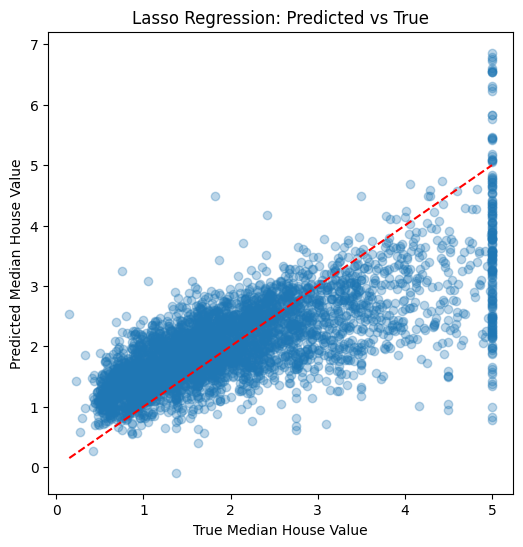

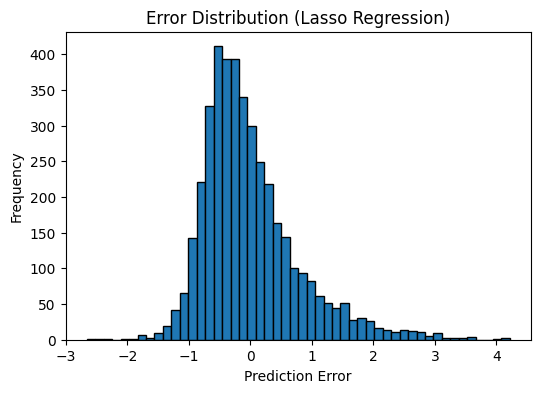

      Feature  Coefficient
0      MedInc     0.392703
6    Latitude    -0.110580
7   Longitude    -0.095754
1    HouseAge     0.015028
5    AveOccup    -0.003972
4  Population     0.000015
3   AveBedrms     0.000000
2    AveRooms    -0.000000


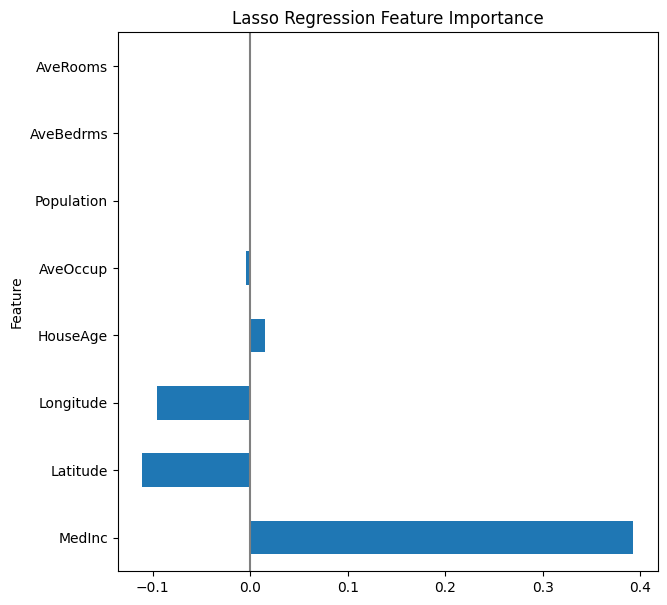

In [11]:
# lasso = Lasso()
lasso = Lasso(alpha=0.1)
lasso_results = other_regressions(lasso, X_train, y_train, X_test, y_test, "Lasso Regression")

Ridge regression method (L2 regularization)

Ridge Regression:
Train R2: 0.6089
Train MAE: 0.5309
Train RMSE: 0.7235

Test R2: 0.5943
Test MAE: 0.5351
Test RMSE: 0.7273



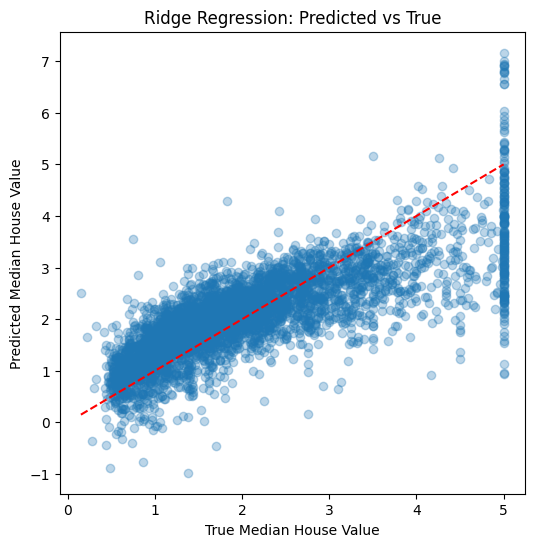

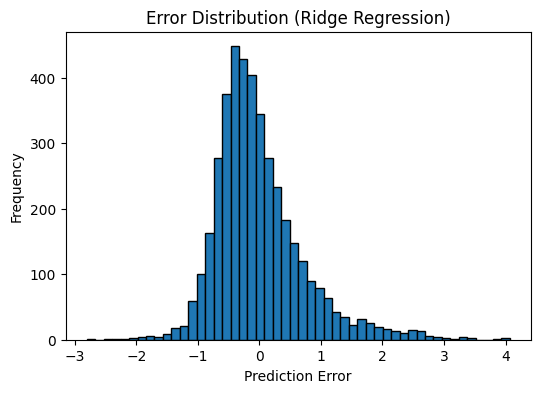

      Feature  Coefficient
3   AveBedrms     0.592088
7   Longitude    -0.434125
0      MedInc     0.433222
6    Latitude    -0.421424
2    AveRooms    -0.098428
1    HouseAge     0.009295
5    AveOccup    -0.004746
4  Population    -0.000008


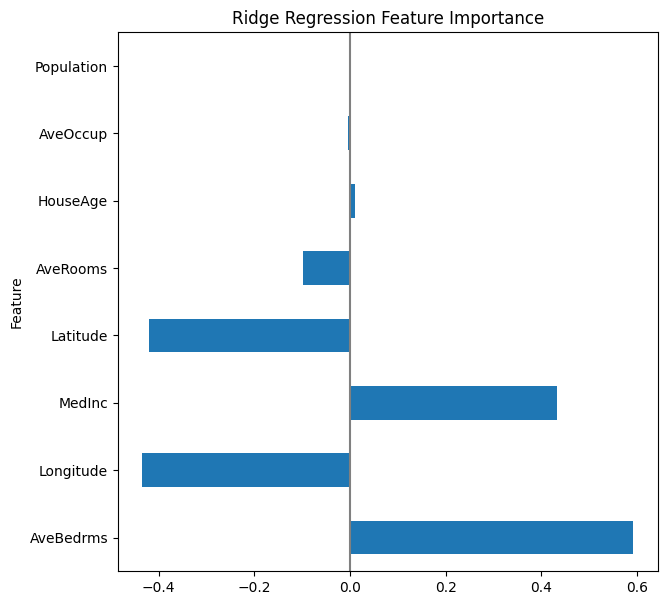

In [21]:
ridge = Ridge()
# ridge = Ridge(alpha=5)
ridge_results = other_regressions(ridge, X_train, y_train, X_test, y_test, "Ridge Regression")

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


Train SVM classifier, using linear kernel to allow us to obtain feature importance. For other kernels it is not possible because data are transformed by kernel method to another space, which is not related to input space

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score,
    confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
)

# Train linear SVM
svm = SVC(kernel="linear", probability=True, random_state=0)
svm.fit(X_train_std, y_train)

# train and test metrics
y_pred_train_svm = svm.predict(X_train_std)
y_prob_train_svm = svm.predict_proba(X_train_std)[:, 1]
y_pred_test_svm = svm.predict(X_test_std)
y_prob_test_svm = svm.predict_proba(X_test_std)[:, 1]

Classification metrics

Train Accuracy: 0.989, ROC AUC: 0.997, Avg Precision: 0.998
Test  Accuracy: 0.982, ROC AUC: 0.996, Avg Precision: 0.998
Confusion Matrix:
 [[40  2]
 [ 0 72]]


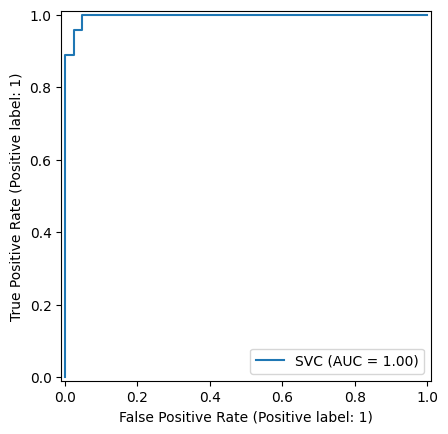

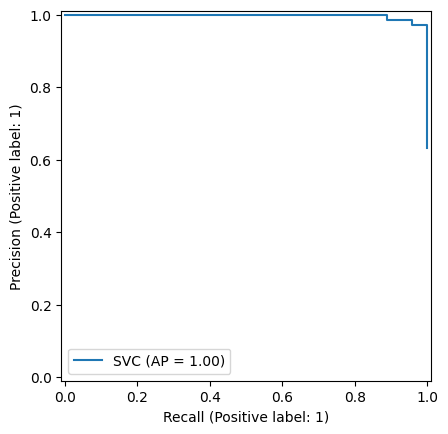

In [ ]:
acc_train_svm = accuracy_score(y_train, y_pred_train_svm)
roc_train_svm = roc_auc_score(y_train, y_prob_train_svm)
ap_train_svm  = average_precision_score(y_train, y_prob_train_svm)

acc_test_svm = accuracy_score(y_test, y_pred_test_svm)
roc_test_svm = roc_auc_score(y_test, y_prob_test_svm)
ap_test_svm  = average_precision_score(y_test, y_prob_test_svm)

print('SVM')
print(f"Train Accuracy: {acc_train_svm:.3f}, ROC AUC: {roc_train_svm:.3f}, Avg Precision: {ap_train_svm:.3f}")
print(f"Test  Accuracy: {acc_test_svm:.3f}, ROC AUC: {roc_test_svm:.3f}, Avg Precision: {ap_test_svm:.3f}")

cm = confusion_matrix(y_test, y_pred_test_svm)
print("Confusion Matrix:\n", cm)

RocCurveDisplay.from_estimator(svm, X_test_std, y_test)
plt.show()
PrecisionRecallDisplay.from_estimator(svm, X_test_std, y_test)
plt.show()

reference: https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

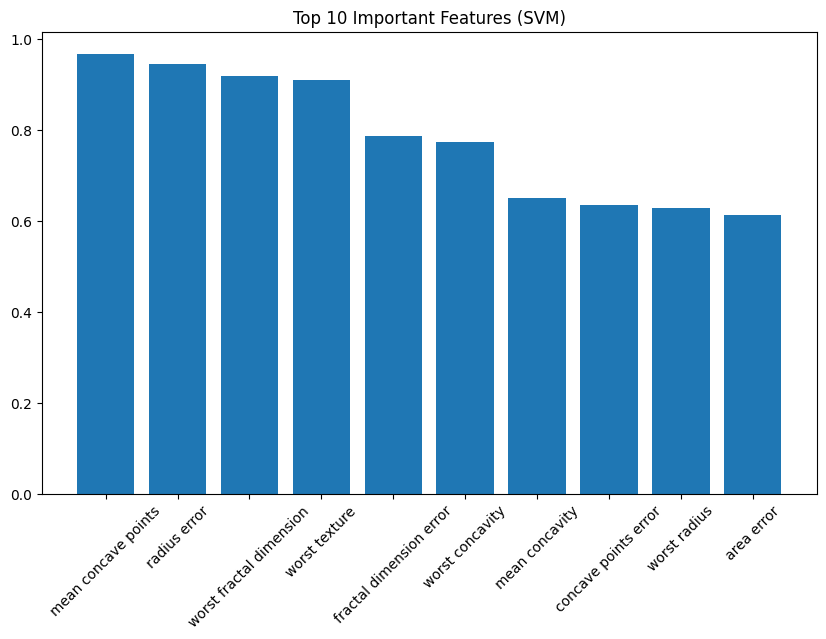

In [ ]:
# Feature importance from coef_
coefs = np.abs(svm.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(10), coefs[indices[:10]], align="center")
plt.xticks(range(10), feature_names[indices[:10]], rotation=45)
plt.title("Top 10 Important Features (SVM)")
plt.show()

Other classification methods

kNN method

Train Accuracy: 0.982, ROC AUC: 0.999, Avg Precision: 0.999
Test  Accuracy: 0.956, ROC AUC: 0.971, Avg Precision: 0.967
Confusion Matrix (Test):
 [[38  4]
 [ 1 71]]


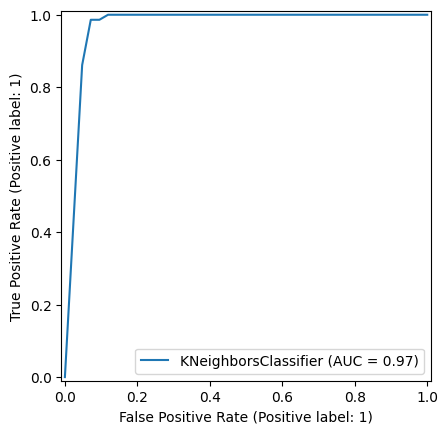

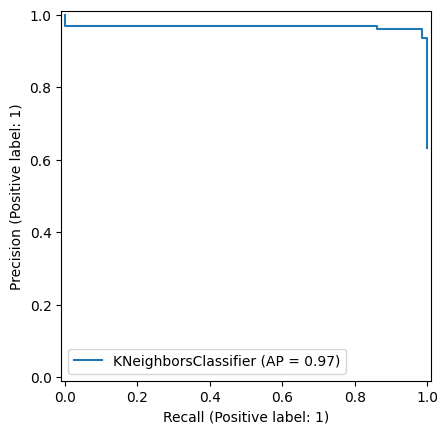

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

y_pred_train_knn = knn.predict(X_train_std)
y_prob_train_knn = knn.predict_proba(X_train_std)[:, 1]
y_pred_test_knn  = knn.predict(X_test_std)
y_prob_test_knn  = knn.predict_proba(X_test_std)[:, 1]

acc_train_knn = accuracy_score(y_train, y_pred_train_knn)
roc_train_knn = roc_auc_score(y_train, y_prob_train_knn)
ap_train_knn  = average_precision_score(y_train, y_prob_train_knn)

acc_test_knn = accuracy_score(y_test, y_pred_test_knn)
roc_test_knn = roc_auc_score(y_test, y_prob_test_knn)
ap_test_knn  = average_precision_score(y_test, y_prob_test_knn)

print('kNN')
print(f"Train Accuracy: {acc_train_knn:.3f}, ROC AUC: {roc_train_knn:.3f}, Avg Precision: {ap_train_knn:.3f}")
print(f"Test  Accuracy: {acc_test_knn:.3f}, ROC AUC: {roc_test_knn:.3f}, Avg Precision: {ap_test_knn:.3f}")

cm_knn = confusion_matrix(y_test, y_pred_test_knn)
print("Confusion Matrix (Test):\n", cm_knn)

RocCurveDisplay.from_estimator(knn, X_test_std, y_test)
plt.show()
PrecisionRecallDisplay.from_estimator(knn, X_test_std, y_test)
plt.show()


Decision tree classifier

Train Accuracy: 1.000, ROC AUC: 1.000, Avg Precision: 1.000
Test  Accuracy: 0.939, ROC AUC: 0.941, Avg Precision: 0.947
Confusion Matrix (Test):
 [[40  2]
 [ 5 67]]


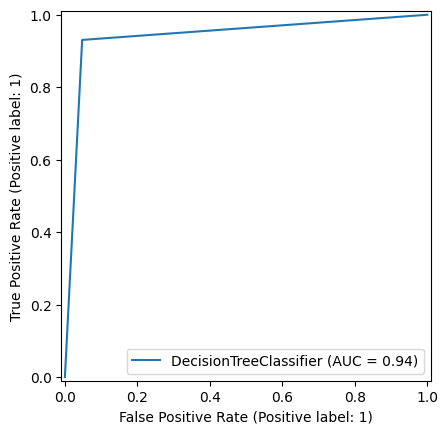

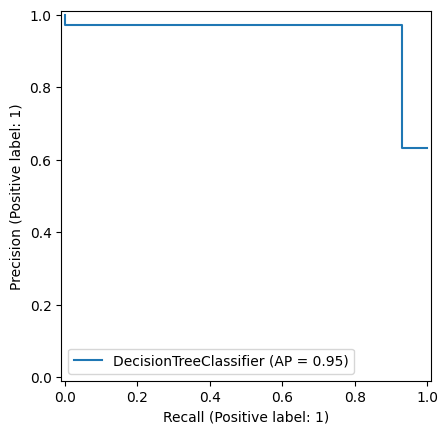

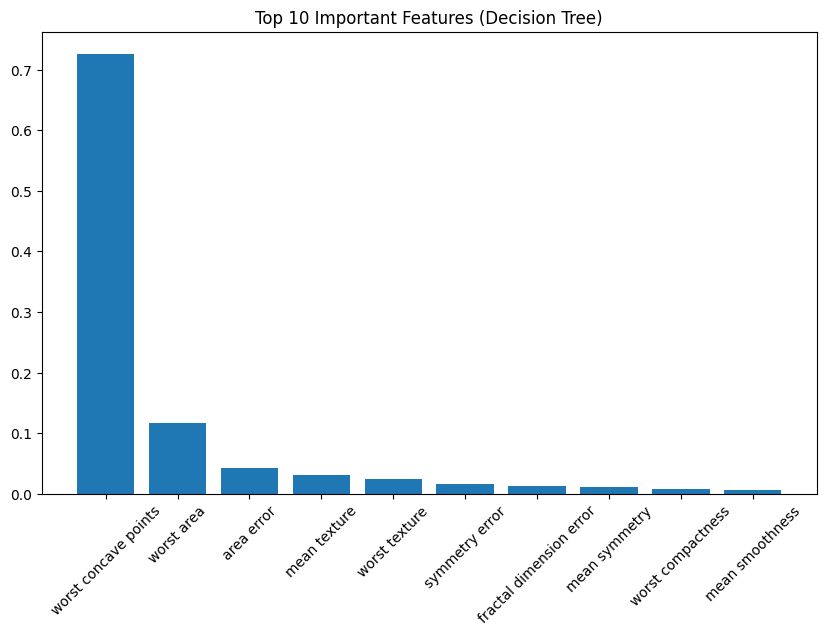

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=0
)
tree.fit(X_train_std, y_train)

y_pred_train_tree = tree.predict(X_train_std)
y_prob_train_tree = tree.predict_proba(X_train_std)[:, 1]
y_pred_test_tree  = tree.predict(X_test_std)
y_prob_test_tree  = tree.predict_proba(X_test_std)[:, 1]

acc_train_tree = accuracy_score(y_train, y_pred_train_tree)
roc_train_tree = roc_auc_score(y_train, y_prob_train_tree)
ap_train_tree  = average_precision_score(y_train, y_prob_train_tree)

acc_test_tree = accuracy_score(y_test, y_pred_test_tree)
roc_test_tree = roc_auc_score(y_test, y_prob_test_tree)
ap_test_tree  = average_precision_score(y_test, y_prob_test_tree)

print(f"Train Accuracy: {acc_train_tree:.3f}, ROC AUC: {roc_train_tree:.3f}, Avg Precision: {ap_train_tree:.3f}")
print(f"Test  Accuracy: {acc_test_tree:.3f}, ROC AUC: {roc_test_tree:.3f}, Avg Precision: {ap_test_tree:.3f}")

cm_tree = confusion_matrix(y_test, y_pred_test_tree)
print("Confusion Matrix (Test):\n", cm_tree)

RocCurveDisplay.from_estimator(tree, X_test_std, y_test)
plt.show()
PrecisionRecallDisplay.from_estimator(tree, X_test_std, y_test)
plt.show()

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), feature_names[indices[:10]], rotation=45)
plt.title("Top 10 Important Features (Decision Tree)")
plt.show()